In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [21]:
d=pd.read_csv('/content/green_tech_data.csv')
d.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [22]:
d.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [23]:
d.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


In [24]:

ms = d.isnull().sum()
print("Missing Values:\n", ms)

dt = d.dtypes
print("\nData Types:\n", dt)


if 'sustainability' in d.columns:
    class_counts = d['sustainability'].value_counts()
    print("\nClass Counts:\n", class_counts)
    class_percentages = class_counts / len(d) * 100
    print("\nClass Percentages:\n", class_percentages)
else:
    print("\n'sustainability' column not found in the DataFrame.")


Missing Values:
 carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

Data Types:
 carbon_emissions      float64
energy_output         float64
renewability_index    float64
cost_efficiency       float64
sustainability          int64
dtype: object

Class Counts:
 sustainability
0    85
1    15
Name: count, dtype: int64

Class Percentages:
 sustainability
0    85.0
1    15.0
Name: count, dtype: float64


In [26]:
X = d[['carbon_emissions' ,	'renewability_index' ,	'cost_efficiency']]
y = d['sustainability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20

[[17  0]
 [ 1  2]]
Accuracy Score: 0.95


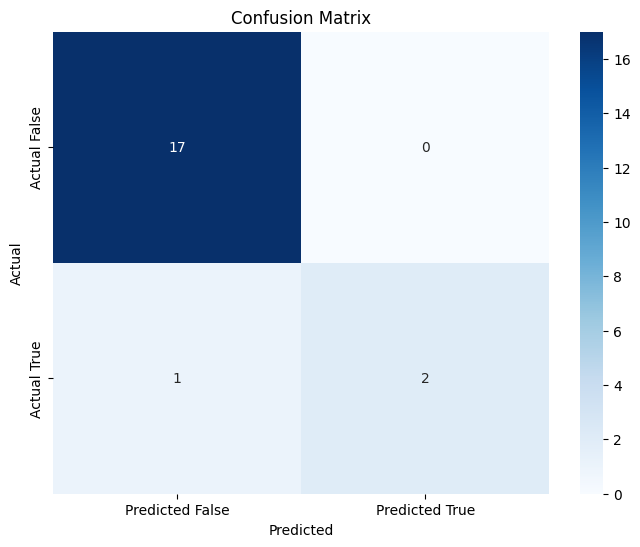

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted False', 'Predicted True'],
            yticklabels=['Actual False', 'Actual True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(y_test ,y_pred, target_names=['Not Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [41]:
cf=pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
cf

,Coefficient
carbon_emissions,-0.022859
renewability_index,1.095343
cost_efficiency,-1.164613


In [42]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']